In [12]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime 

[Istat Serie Storiche]("http://seriestoriche.istat.it/index.php?id=1&no_cache=1&tx_usercento_centofe%5Bcategoria%5D=7&tx_usercento_centofe%5Baction%5D=show&tx_usercento_centofe%5Bcontroller%5D=Categoria&cHash=1b020e5419ca607971010a98271e3209")

[Data set link (in xls)]("http://seriestoriche.istat.it/fileadmin/documenti/Tavola_7.3.xls")

In [13]:
url = '/tmp/female_birth.csv'
df1 = pd.read_csv(url)
print(df1.head())

         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


In [14]:
df1 = df1[['Date', 'Births']]
df1.sort_values(by='Date', inplace=True, ascending=True)
print(df1.head())

         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


In [21]:
fig = px.line(df1, x = 'Date', y = 'Births', title='Number of daily female births in California in 1959 e 1960')
fig.show()

In [16]:
df1.insert(0, 'id', range(0,len(df1)))
print(df1.head())

   id        Date  Births
0   0  1959-01-01      35
1   1  1959-01-02      32
2   2  1959-01-03      30
3   3  1959-01-04      31
4   4  1959-01-05      44


In [17]:
from sklearn.model_selection import train_test_split
X = df1[['id']].values.reshape(-1,1)
y = df1[['Births']].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.svm import SVR

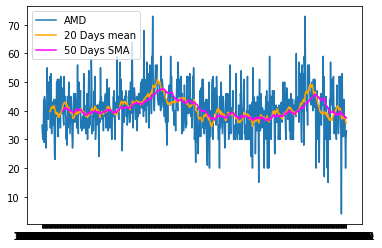

In [22]:
rolling_mean = df1.Births.rolling(window=20).mean()
rolling_mean2 = df1.Births.rolling(window=50).mean()
plt.plot(df1.Date, df1.Births, label='AMD')
plt.plot(df1.Date, rolling_mean, label='20 Days mean', color='orange')
plt.plot(df1.Date, rolling_mean2, label='50 Days SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()